In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import matplotlib.patches as patches
from sklearn.cluster import KMeans
from PIL import Image
from numpy import *

# Question 1 (14 marks) 

Write two functions compute_gradient_magnitude(gr_im, kx, ky)  and 
compute_gradient_direction(gr_im, kx, ky) to compute the magnitude and direction of 
gradient of the grey image gr_im with the horizontal kernel kx and vertical kernel ky.


In [25]:
def compute_gradient_magnitude(gr_im, kx, ky):

    # Apply horizontal  kernels
    gx = convolve2d(gr_im, kx, mode='same',boundary='fill')

    #vertical kernels
    gy = convolve2d(gr_im, ky, mode='same',boundary='fill')

    # Compute the magnitude of the gradient
    grad_mag = np.sqrt(gx**2 + gy**2)
    
    return grad_mag.astype(np.float64)

def compute_gradient_direction(gr_im, kx, ky):

    # Apply horizontal  kernels
    gx = convolve2d(gr_im, kx, mode='same',boundary='fill')
    #vertical kernels
    gy = convolve2d(gr_im, ky, mode='same',boundary='fill')
    
    # Compute the direction of the gradient
    grad_dir = np.arctan2(gy, gx)
    
    return grad_dir.astype(np.float64)

Image shape: (720, 720)
Image: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Gradient magnitude:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Gradient direction (in radians):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\Users\hadee\AppData\Local\Temp\ipykernel_5508\2159174739.py:9: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.uint8)
C:\Users\hadee\AppData\Local\Temp\ipykernel_5508\2159174739.py:9: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.uint8)


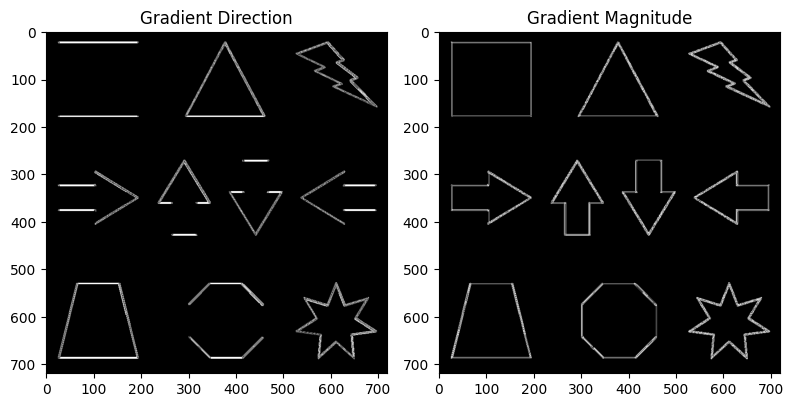

In [26]:
img=cv2.imread(r"C:\Users\hadee\Desktop\computer_vision\coursework\data\shapes.png",cv2.IMREAD_GRAYSCALE)
# Ensure the image is of type uint8
gr_im = np.array(img, dtype=np.uint8)

print('Image shape: {}'.format(gr_im.shape))
print('Image: {}'.format(gr_im))

# Create the horizontal and vertical kernels
kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.uint8)
ky = kx.T

# Compute the magnitude and direction of the gradient
grad_mag = compute_gradient_magnitude(gr_im, kx, ky)
grad_dir = compute_gradient_direction(gr_im, kx, ky)

print("Gradient magnitude:\n", grad_mag)
np.save("Gradient magnitude.npy", grad_mag)
print("Gradient direction (in radians):\n", grad_dir)
np.save("Gradient direction.npy", grad_dir)

plt.figure(figsize=(8, 5))

plt.subplot(121)
plt.imshow(grad_dir, cmap='gray')
plt.title("Gradient Direction")

plt.subplot(122)
plt.imshow(grad_mag, cmap='gray')
plt.title("Gradient Magnitude")

plt.tight_layout()
plt.show()


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(720, 720)

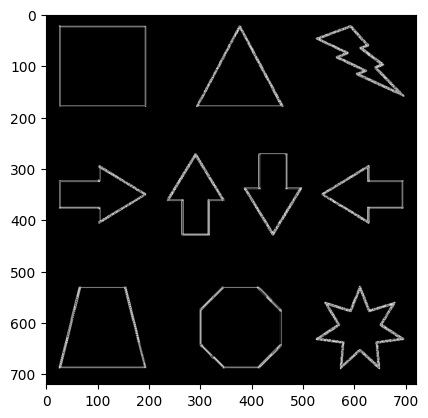

In [36]:
array = np.load("Gradient magnitude.npy")
print(array)
plt.imshow(array, cmap='gray')
array.shape

# Question 2 (20 marks) 
Write a function generate_bovw_spatial_histogram(im, locations, clusters, division) to create 
bag of visual words representation of an image im whose features are located at locations and 
the quantised labels of those features are stored in clusters.

You have to build the histogram 
based on the division information provided in division. For example, if division = [2, 3], you 
have to imagine dividing the image along Y-axis in 2 parts and along X-axis in 3 parts (as 
shown in the right most figure below), else if division = [2, 2], you have to imagine dividing 
the image in 2 parts along both the axes, else if division = [1, 1], you just compute the bag-of
visual-words histogram on the entire image without dividing into any parts. 

You have to 
showcase three test cases to call the above function in order to calculate the bag-of-visual
words spatial histograms on the image im showcasing coarse and fine divisions. 

In [41]:
import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [42]:
img=cv2.imread(r"C:\Users\hadee\Desktop\computer_vision\coursework\data\notre_dame_1.jpg",0)
# Ensure the image is of type uint8
im = cv2.resize(img,(150,150))
print('Image shape: {}'.format(im.shape))
print('Image: {}'.format(im))

Image shape: (150, 150)
Image: [[255 255 255 ... 243 242 242]
 [255 255 255 ... 245 243 243]
 [255 255 255 ... 244 244 244]
 ...
 [117 114 120 ... 124 121 133]
 [112 122 114 ...  23  68  59]
 [102 112 111 ... 120 120 123]]


In [43]:
def sift_features(im):

    # Convert the image to grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    # Initialize the SIFT detector
    sift = cv2.SIFT_create()

    # Detect the SIFT features in the image
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    # Convert the keypoints to a list of (x, y)
    
    locations = np.array([(kp.pt[0], kp.pt[1]) for kp in keypoints], dtype=np.float64)
    # Convert coordinates to int64
    locations = locations.astype(np.int64)
    
    
    k=cv2.drawKeypoints(gray, keypoints,im, color = (0, 255, 0))
    plt.imshow(k, cmap='gray')
    print('Feature extracted')

    return  locations, descriptors

In [50]:
#with plotting
def  generate_bovw_spatial_histogram(im, locations, clusters, division):

    height, width = im.shape[:2]
    div_y, div_x = division
    step_y, step_x = height // div_y, width // div_x
    
    fig, axs = plt.subplots(div_y, div_x*2, figsize=(div_x*6, div_y*3))
    
    # Initialize an empty list to store histograms for each division
    histograms = []
    
    for i in range(div_y):
        for j in range(div_x):
            ax_img = axs[i, j*2] if div_y > 1 else axs[j*2]
            ax_hist = axs[i, j*2+1] if div_y > 1 else axs[j*2+1]
            
            # Define the boundaries of the current division
            start_x, end_x = j * step_x, (j + 1) * step_x
            start_y, end_y = i * step_y, (i + 1) * step_y
            
            # Filter locations to find those within the current division
            mask = (locations[:, 0] >= start_x) & (locations[:, 0] < end_x) & \
                   (locations[:, 1] >= start_y) & (locations[:, 1] < end_y)
            division_clusters = clusters[mask]
            division_locations = locations[mask]
            # Plot the subregion
            # Plot the keypoints for the current division
            ax_img.imshow(im)
            ax_img.scatter(division_locations[:, 0], division_locations[:, 1], c='red', s=10, marker='o')
            ax_img.add_patch(patches.Rectangle((start_x, start_y), step_x, step_y, linewidth=1, edgecolor='r', facecolor='none'))
            ax_img.set_xlim([0, width])
            ax_img.set_ylim([height, 0])
            ax_img.set_title(f"Subregion ({i+1}, {j+1}) with Keypoints")
            ax_img.axis('off')
    
            # Plot the histogram for the current division
            hist, bins = np.histogram(division_clusters, bins=np.arange(np.max(clusters) + 2), density=False)
            # Append the histogram to the list
            histograms.append(hist)
            # Plot the histogram for the current division
            ax_hist.bar(bins[:-1], hist, width=0.5)
            ax_hist.set_title(f"Histogram ({i+1}, {j+1})")
    
    plt.tight_layout()
    plt.show()
    
# Concatenate all histograms to form a single feature vector
    bovw_feature = np.concatenate(histograms).astype(np.int64)
    
    return bovw_feature
    


Feature extracted


C:\Users\hadee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hadee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


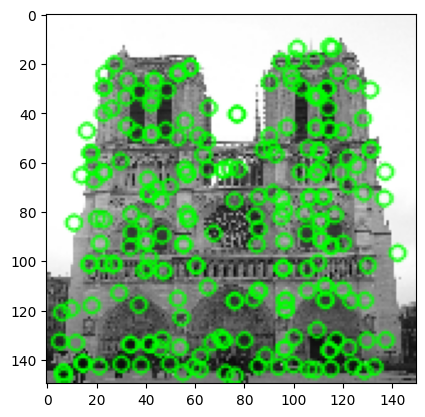

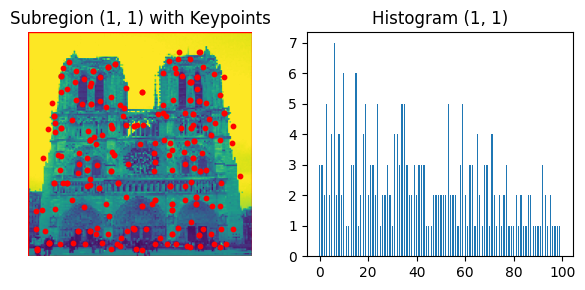

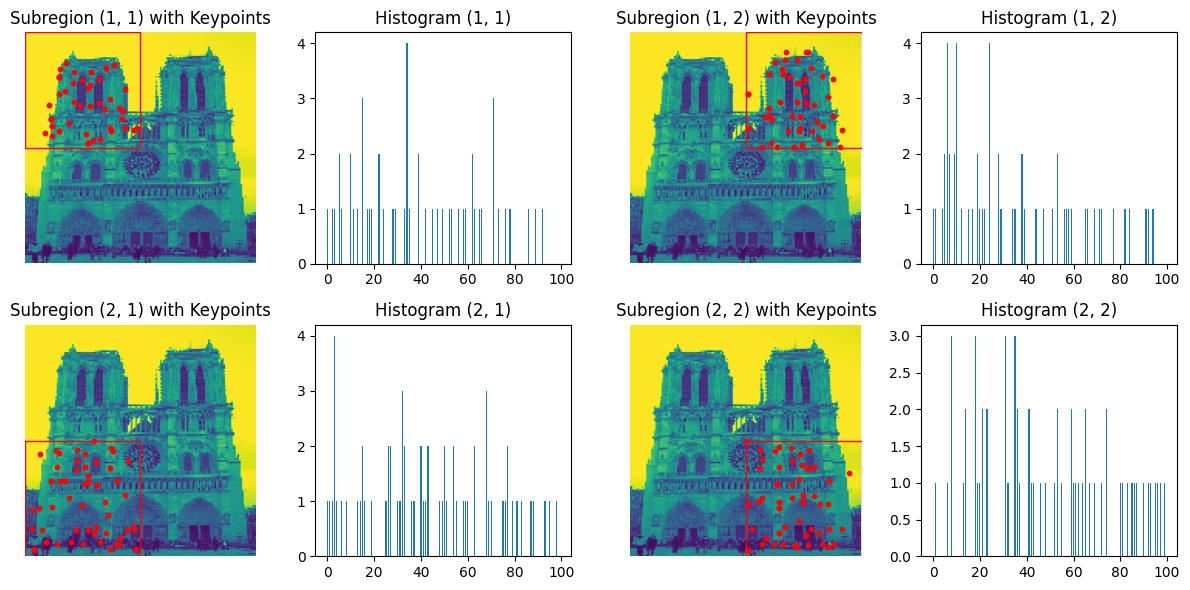

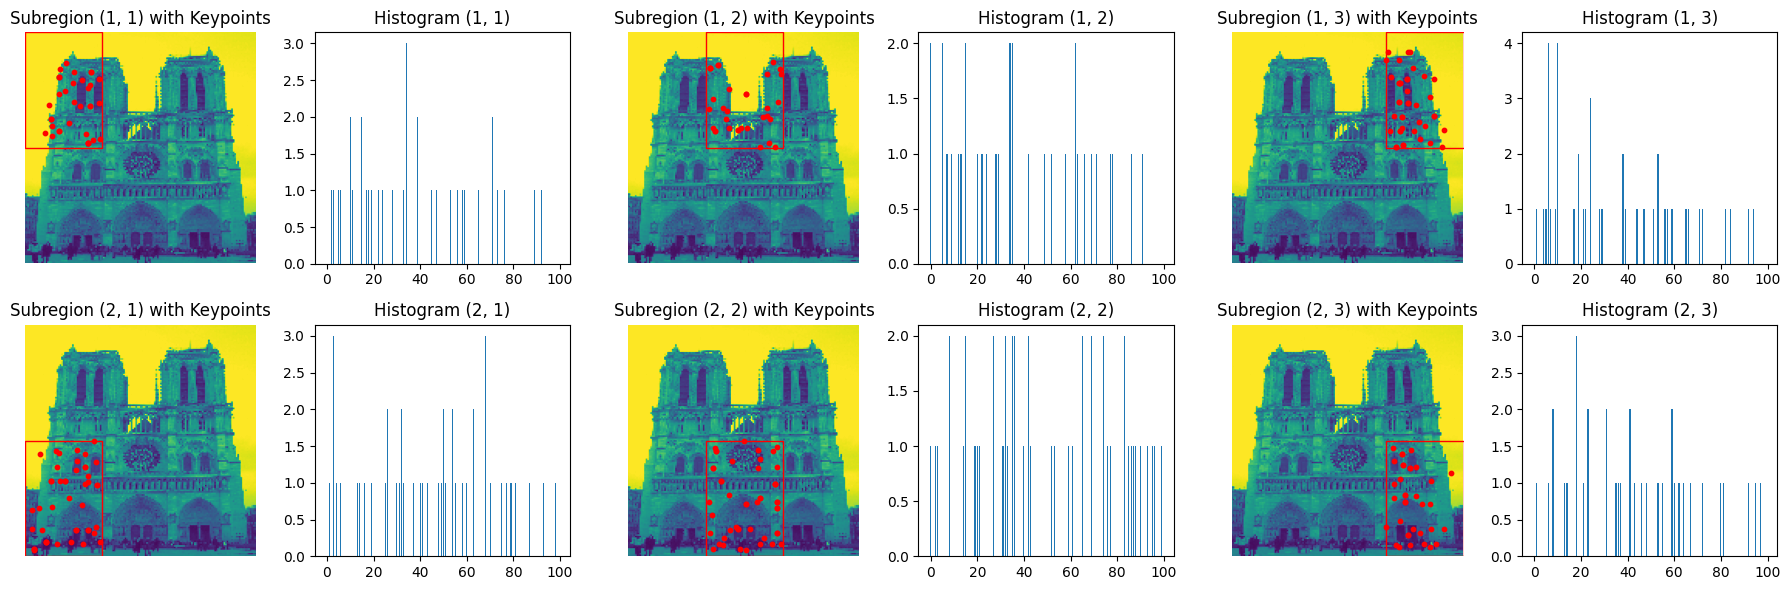

In [61]:
img_path=r"C:\Users\hadee\Desktop\computer_vision\notre_dame_1.jpg"
img = cv2.imread(img_path)
img= cv2.resize(img,(150,150))

#feature_extracting
locations, descriptors = sift_features(img)
#clustring
kmeans = KMeans(n_clusters=100, random_state=0).fit(descriptors)
# Assign each descriptor to a cluster
cluster_ids = kmeans.labels_
# Convert cluster IDs to a numpy array of dtype int64
clusters = np.array(cluster_ids, dtype=np.int64)  
    
#final call
bovw_feature1 = generate_bovw_spatial_histogram(im, locations, clusters, [1, 1])
np.save("Q2test1-1.npy", bovw_feature1) 
bovw_feature2 = generate_bovw_spatial_histogram(im, locations, clusters, [2, 2])
np.save("Q2test2-2.npy", bovw_feature2)
bovw_feature3 = generate_bovw_spatial_histogram(im, locations, clusters, [2, 3])
np.save("Q2test2-3.npy", bovw_feature3)

In [63]:
q1 = np.load("Q2test2-3.npy")
print(q1)
q1.dtype

[0 0 1 1 0 1 1 0 0 0 2 1 0 0 0 2 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 3 0 0
 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 2 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 2 0 1 0 1 0
 0 1 1 0 2 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 2 2 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 2 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 4 1 0 1 4 0 0 0 0 0 0 1 0 2 0 1
 1 0 3 0 0 0 1 1 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 1 0 0 0 1 0 2 0 0 1 1 0
 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 0 3 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 2 0 0 0 1 1 2
 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 2 1 0 0 2 1 0 0 1 0 1 0 0 2 0 0 0 0 3 0
 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 2 0 0 0 0 0 1 2 0 0 0 1 1 1 0 0 0 0 0 2 0 0 0 1 2 1 0 2 2 0 0 0 1 0 2 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 2 0 0 0 2 0 0 0 0 2 0 1 1 0 0 0
 0 0 2 0 1 1 1 1 0 1 0 0 

dtype('int64')

# Question 3 (10 marks) 
Write a function compute_rotation_matrix(points, theta) to compute the rotation matrix in 
homogeneous coordinate system to rotate a shape depicted with 2
dimensional (𝑥,𝑦) coordinates points with an angle 𝜃 (theta in the definition) in the 
anticlockwise direction about the centre of the shape. 


In [77]:
#final_solution :
def compute_rotation_matrix(points, theta):
        M,N = points.shape[:2]
        T = np.array([[1, 0, M/2],
                     [0, 1, N/2],
                     [0, 0, 1  ]])
        ca = np.cos(theta)
        sa = np.sin(theta)
        R = np.array([[ca, -sa, 0],
                   [sa,  ca, 0],
                   [ 0,   0, 1]])
        return T @ R @ np.linalg.inv(T)


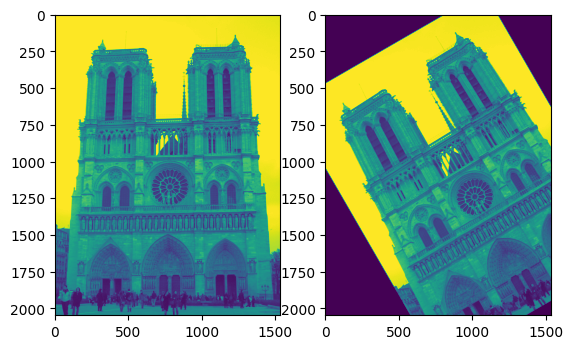

In [78]:
a = cv2.imread(r"C:\Users\hadee\Desktop\computer_vision\notre_dame_1.jpg", 0)
plt.subplot(121); plt.imshow(a);
d = warp(a, compute_rotation_matrix(a, np.pi/6))
plt.subplot(122); plt.imshow(d)
plt.show()

In [80]:
points = np.load(r"C:\Users\hadee\Desktop\computer_vision\coursework\data\points.npy")
# Print the data to verify that it has been loaded correctly
print(points)
result=compute_rotation_matrix(points, 45.0)
np.save("Q3rot.npy", result) 
print("Rotation Matrix\n",result)
print(result.shape)

[[ 295  966]
 [ 325  760]
 [ 434  888]
 ...
 [ 497 1048]
 [  67  769]
 [ 762  752]]
Rotation Matrix
 [[ 5.25321989e-01 -8.50903525e-01  1.18754593e+03]
 [ 8.50903525e-01  5.25321989e-01 -2.12678413e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(3, 3)
